#Weekly Sales Analysis
This is a Python script that analyzes weekly sales data for a business. The script reads in multiple CSV files containing sales data for individual days, combines them into a single DataFrame, and performs various calculations and visualizations on the data.

##Getting Started
To use this script, you will need to have Python 3 installed on your computer, as well as the following Python packages:

- pandas
- matplotlib

You can install these packages using the following command:

pip install pandas matplotlib


Then just Runtime Runall with a datafile organized in the data format way it is mentioned in the script and generate several visualizations of the sales data, including a pie chart of sales by weekday and a bar chart of sales by day of week.

<ipython-input-16-c199aea57f9c>:17: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['weeknumber'] = df['Date'].dt.week


<bound method Axes.set_title of <Axes: ylabel='Sales in Millions'>>

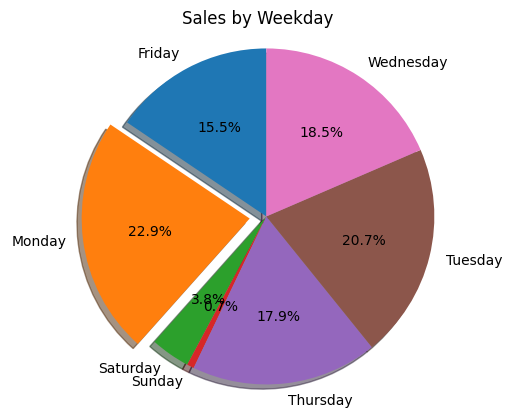

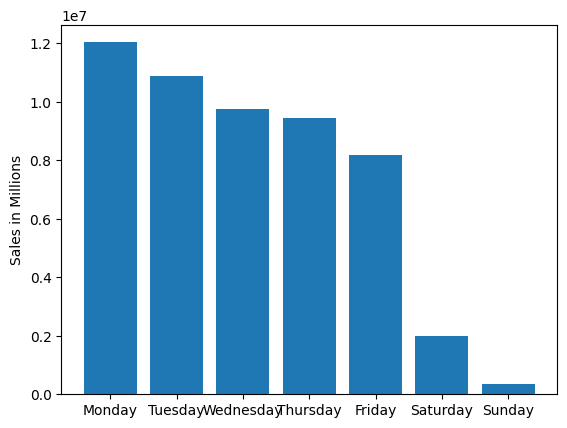

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Read all CSV files into a single DataFrame
df = pd.read_csv('all_sales_2016_feb_2023.csv')

# Extract relevant columns
df = df[['State','City','Plan','Sales Rep', 'Total', 'LastName', 'FirstName', 'Date']]

# Convert date column to datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Add weekday, day of week number, month name, and week number columns
df['weekday'] = df['Date'].dt.day_name()
df['daynumber'] = df['Date'].dt.dayofweek
df['monthname'] = df['Date'].dt.month_name()
df['weeknumber'] = df['Date'].dt.week

# Group by week number and resample by week
weekly_sales = df.groupby(pd.Grouper(key='Date', freq='W')).sum()

# Pie chart of sales by weekday
sales_by_weekday = df.groupby('weekday')['Total'].sum()
explode = (0, 0.1, 0, 0, 0, 0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(sales_by_weekday, explode=explode, labels=sales_by_weekday.index, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title('Sales by Weekday')

# Bar chart of sales by day of week
sales_by_day = df.groupby('daynumber')['Total'].sum()
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fig2, ax2 = plt.subplots()
ax2.bar(sales_by_day.index, sales_by_day)
ax2.set_xticks(range(len(day_names)))
ax2.set_xticklabels(day_names)
ax2.set_ylabel('Sales in Millions')
ax2.set_title
